In [1]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Fast Fourier Transform (FFT) 
# Short Term Fourier Transform (STFT) / Spectrogram
# Mel Frequency Cepstral Coefficients (MFCCs)
#   - Capture timbral/textural aspects of sound
#   - Approximates the human auditory system
#   - 13 to 40 coefficients
#   - Calculated at each frame to see how they evolve over time

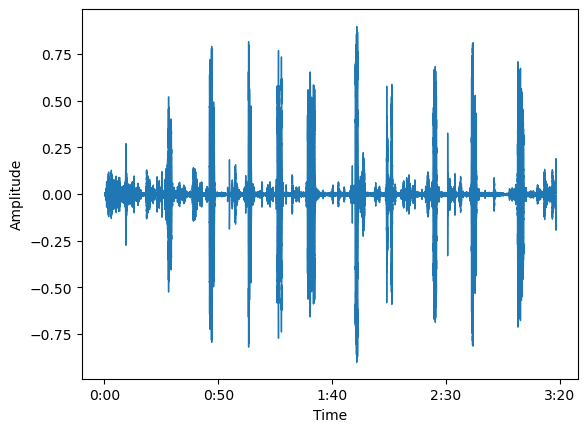

In [3]:
# Get waveform

file = "../ABA-Audio-Data/2.wav"
signal, sr = librosa.load(file, sr=48000)
librosa.display.waveshow(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

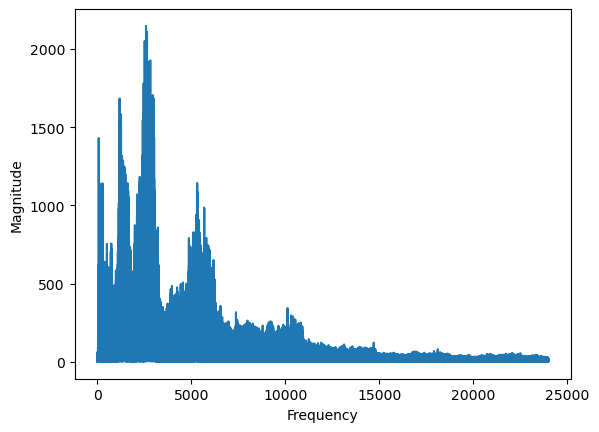

In [4]:
# Get FFT

fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_freq = frequency[:int(len(frequency)/2)]
left_mag = magnitude[:int(len(frequency)/2)]

plt.plot(left_freq, left_mag)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


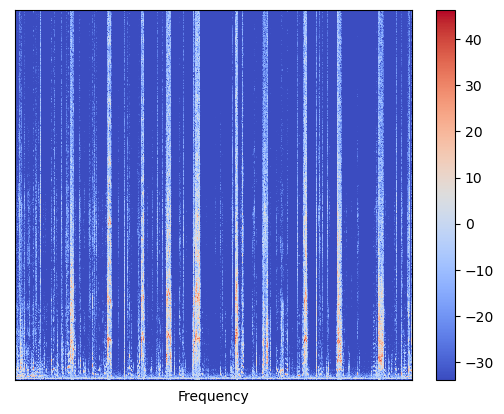

In [5]:
# Get STFT - Spectrogram

# Number of samples per FFT.
n_fft = 2048

# Amount we are shifting each FFT to the right.
hop_length = 512

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.xlabel("Frequency")
plt.colorbar()
plt.show()

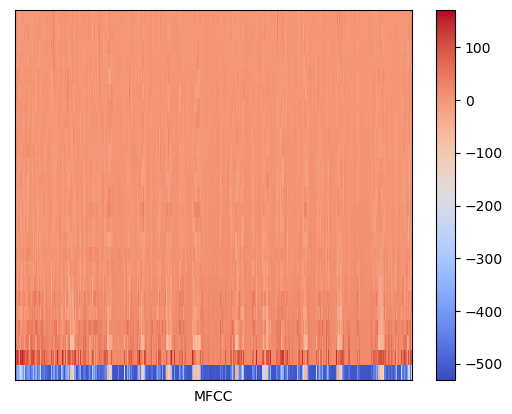

In [6]:
# Get MFCCs

n_mfcc = 25

MFCCs = librosa.feature.mfcc(y=signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=n_mfcc)

librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.xlabel("MFCC")
plt.colorbar()
plt.show()